Import Data

In [2]:
%matplotlib inline
import csv
import pandas as pd
from scipy.stats import pearsonr

In [3]:
name = []
location = []
with open ('public_universities_rankings.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        name.append(row[0])
        location.append(row[2])
        
public_universities_rankings = pd.read_csv('public_universities_rankings.csv') 

To see the basic layout of the variable.

In [3]:
public_universities_rankings.head()

,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,University of California--Berkeley,"Berkeley, CA",20,"The University of California--Berkeley, often ...",40.191,13.509,27496
1,University of California--Los Angeles,"Los Angeles, CA",24,"The University of California--Los Angeles, com...",39.518,12.836,29585
2,University of Virginia,"Charlottesville, VA",24,"Founded by Thomas Jefferson, the University of...",45.066,15.722,16736
3,University of Michigan--Ann Arbor,"Ann Arbor, MI",27,The University of Michigan boasts one of the b...,43.476,13.856,28312
4,University of North Carolina--Chapel Hill,"Chapel Hill, NC",30,"The University of North Carolina--Chapel Hill,...",33.916,8.834,18415


In [4]:
public_universities_rankings['tuition_difference'] = public_universities_rankings.tuition_and_fees-public_universities_rankings.in_state
public_universities_rankings.head()
public_universities_rankings.tuition_difference.head()

0    26.682
1    26.682
2    29.344
3    29.620
4    25.082
Name: tuition_difference, dtype: float64

The following cell will eliminate the city but only keep the state for mapping purpose

In [5]:
for index, row in public_universities_rankings.iterrows():
    state = row.location.split(',')[1][1:3] #position 0 is a space
    public_universities_rankings.loc[index, "location"] = state
    
    
public_universities_rankings.head()

,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment,tuition_difference
0,University of California--Berkeley,CA,20,"The University of California--Berkeley, often ...",40.191,13.509,27496,26.682
1,University of California--Los Angeles,CA,24,"The University of California--Los Angeles, com...",39.518,12.836,29585,26.682
2,University of Virginia,VA,24,"Founded by Thomas Jefferson, the University of...",45.066,15.722,16736,29.344
3,University of Michigan--Ann Arbor,MI,27,The University of Michigan boasts one of the b...,43.476,13.856,28312,29.620
4,University of North Carolina--Chapel Hill,NC,30,"The University of North Carolina--Chapel Hill,...",33.916,8.834,18415,25.082


In [6]:
# To do a chisquare test
from scipy.stats import chisquare
distribution=public_universities_rankings['tuition_and_fees'].value_counts()
chisquare(distribution)

Power_divergenceResult(statistic=0.9857142857142855, pvalue=1.0)

P-value=1.0 means that the differences are significant

In [7]:
import numpy as np
symbolsForNA=['†']
public_universities_rankings.replace(symbolsForNA,np.nan,inplace=True)

To know the frequency of 'tuition_and_fees'

In [8]:
public_universities_rankings['tuition_and_fees'].value_counts()

26.334    2
18.899    1
29.850    1
30.025    1
16.094    1
23.429    1
28.840    1
11.688    1
21.234    1
20.318    1
32.382    1
17.620    1
27.005    1
21.451    1
20.193    1
25.994    1
27.039    1
40.263    1
25.713    1
22.904    1
34.246    1
11.403    1
29.229    1
32.738    1
24.673    1
41.718    1
26.266    1
18.376    1
21.052    1
41.387    1
         ..
33.654    1
23.042    1
26.152    1
16.215    1
33.764    1
25.851    1
21.432    1
21.595    1
21.208    1
29.791    1
27.028    1
29.371    1
27.130    1
31.592    1
34.828    1
26.180    1
40.191    1
31.320    1
35.858    1
24.800    1
22.467    1
28.846    1
26.950    1
25.673    1
26.399    1
17.325    1
28.768    1
17.654    1
22.244    1
29.125    1
Name: tuition_and_fees, Length: 139, dtype: int64

In [9]:
from pandas.api.types import CategoricalDtype
public_universities_rankings['location']=public_universities_rankings['location'].astype(CategoricalDtype(ordered=True))

In [10]:
public_universities_rankings['location'].cat.categories

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

In [11]:
public_universities_rankings.describe()

,rank,tuition_and_fees,in_state,undergrad_enrollment,tuition_difference
count,140.000000,140.000000,133.000000,140.000000,133.000000
mean,135.928571,27.404257,10.895714,19990.328571,16.497308
std,60.385529,6.734391,3.038571,10207.112126,5.316482
min,20.000000,11.403000,4.965000,1520.000000,3.231000
25%,85.000000,22.235500,8.820000,12938.750000,13.386000
50%,139.000000,26.462500,10.622000,19552.000000,15.958000
75%,194.750000,31.421000,13.296000,25577.000000,18.930000
max,220.000000,45.066000,18.687000,54513.000000,29.620000


In [21]:
public_universities_rankings.tuition_and_fees.describe()

count    140.000000
mean      27.404257
std        6.734391
min       11.403000
25%       22.235500
50%       26.462500
75%       31.421000
max       45.066000
Name: tuition_and_fees, dtype: float64

In [22]:
public_universities_rankings.tuition_difference.describe()

count    133.000000
mean      16.497308
std        5.316482
min        3.231000
25%       13.386000
50%       15.958000
75%       18.930000
max       29.620000
Name: tuition_difference, dtype: float64

To know which state has the highest tuition.

In [25]:
max_diff = max(public_universities_rankings.tuition_difference)

for index, row in public_universities_rankings.iterrows():
    if row.tuition_difference == max_diff:
        print(row)
        break

name                                    University of Michigan--Ann Arbor
location                                                               MI
rank                                                                   27
description             The University of Michigan boasts one of the b...
tuition_and_fees                                                   43.476
in_state                                                           13.856
undergrad_enrollment                                                28312
tuition_difference                                                  29.62
Name: 3, dtype: object



## Regression: Enrollment VS In-State and Out-State Tuition
---

In [5]:
public_universities_rankings = pd.read_csv('public_universities_rankings.csv')
public_universities_rankings = public_universities_rankings.dropna()
public_universities_rankings.head()

,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,University of California--Berkeley,"Berkeley, CA",20,"The University of California--Berkeley, often ...",40.191,13.509,27496
1,University of California--Los Angeles,"Los Angeles, CA",24,"The University of California--Los Angeles, com...",39.518,12.836,29585
2,University of Virginia,"Charlottesville, VA",24,"Founded by Thomas Jefferson, the University of...",45.066,15.722,16736
3,University of Michigan--Ann Arbor,"Ann Arbor, MI",27,The University of Michigan boasts one of the b...,43.476,13.856,28312
4,University of North Carolina--Chapel Hill,"Chapel Hill, NC",30,"The University of North Carolina--Chapel Hill,...",33.916,8.834,18415


Let's set the features that we want to perform regression on. We have the following features:

In [4]:
features = public_universities_rankings.columns.values
print(features)

['name' 'location' 'rank' 'description' 'tuition_and_fees' 'in_state'
 'undergrad_enrollment']


In [6]:
x = public_universities_rankings.in_state # In state tuition
y = public_universities_rankings.tuition_and_fees # Out State tuition
p = pearsonr(x,y)
print('Pearson', p[0], ' \t Is significant?',p[1]<0.05)
print(p)

Pearson 0.671599066022371  	 Is significant? True
(0.671599066022371, 8.93548105683117e-19)


In [7]:
import statsmodels.formula.api as smf

formula='undergrad_enrollment ~ tuition_and_fees + in_state'
LinRegEPI = smf.ols(formula, data=public_universities_rankings).fit()
LinRegEPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     undergrad_enrollment   R-squared:                       0.074
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     5.190
Date:                  Thu, 15 Mar 2018   Prob (F-statistic):            0.00678
Time:                          01:29:37   Log-Likelihood:                -1403.7
No. Observations:                   133   AIC:                             2813.
Df Residuals:                       130   BIC:                             2822.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.698e+04   3505.918      4.843      0.000       1e+04    2.39e+04
tuition_and_fees   509.8780    160.716      3.173      0.002     191.920     827.836
in_state          -923.4927    362.680     -2.546      0.012   -1641.012    -205.974
==============================================================================
Omnibus:                       12.991   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.827
Skew:                           0.709   Prob(JB):                     0.000994
Kurtosis:                       3.697   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the regression results we can see that the undergraduate enrollment is positively correlated with out-state tuition but negatively correlated with in-state tuition (with both P-value<0.05). 

# Choropleth Mapping
---

To create a choropleth map of all the public universities of interest, we would need another dataset that only has location and tuition information.

In [12]:
df = public_universities_rankings[["location", "tuition_and_fees"]]
df.head()

,location,tuition_and_fees
0,CA,40.191
1,CA,39.518
2,VA,45.066
3,MI,43.476
4,NC,33.916


Grouping and Calculation of Mean
---

In [13]:
df_avg_tuition = df.groupby('location', as_index = False).mean()
df_avg_tuition.head()

,location,tuition_and_fees
0,AK,22.469000
1,AL,23.516500
2,AR,23.168000
3,AZ,27.741500
4,CA,34.623583


Defination of Map Variable
---

In [14]:
compressedMap = '/Users/Zhaokai/Downloads/PROJECT-master/PROJECT-master/tl_2010_us_state10/'

In [15]:
import geopandas as gpd
usmap = gpd.GeoDataFrame.from_file(compressedMap)
usmap['STUSPS10'] = usmap['STUSPS10'].astype(CategoricalDtype(ordered=True))

In [16]:
usmap.head()

,REGION10,DIVISION10,STATEFP10,STATENS10,GEOID10,STUSPS10,NAME10,LSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,4,8,56,01779807,56,WY,Wyoming,00,G4000,A,251470069067,1864445306,+42.9918024,-107.5419255,"POLYGON ((-108.621313 45.000277, -108.619726 4..."
1,1,2,42,01779798,42,PA,Pennsylvania,00,G4000,A,115883064314,3397122731,+40.9042486,-077.8280624,"POLYGON ((-80.519091 39.9622, -80.519097 39.96..."
2,2,3,39,01085497,39,OH,Ohio,00,G4000,A,105828706692,10269012119,+40.4149297,-082.7119975,"POLYGON ((-84.05270899999999 38.771226, -84.05..."
3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,314160748240,756659673,+34.4391265,-106.1261511,"POLYGON ((-109.046156 34.579291, -109.04616 34..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25141638381,6989579585,+38.9466584,-076.6744939,"POLYGON ((-75.747761 39.143338, -75.747646 39...."


Merging background map and data frame map to make a Choropleth Map
---

In [17]:
map_states = list(usmap.STUSPS10)
df_states = list(df_avg_tuition.location)

print("map states are: ", map_states[0:5], "...")
print("df states are: ", df_states[0:5], "...")

map states are:  ['WY', 'PA', 'OH', 'NM', 'MD'] ...
df states are:  ['AK', 'AL', 'AR', 'AZ', 'CA'] ...


Notice df states have a space in the very front. This will lead to unsuccessful merge. The next cell we will take away the space in the datefame 'df'

In [18]:
panda_map = usmap.merge(df_avg_tuition, 
                    left_on = 'STUSPS10', right_on = 'location' )

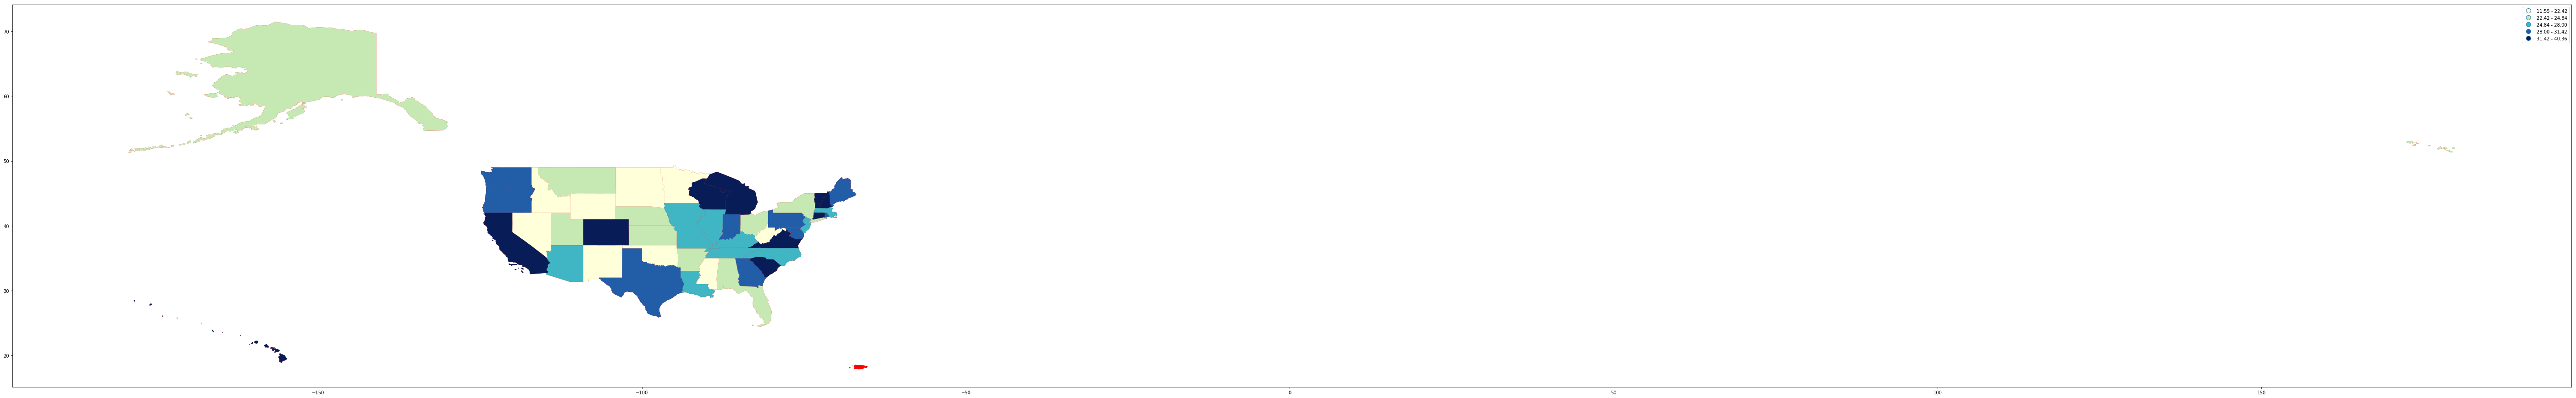

In [20]:
base = usmap.plot(color='red',figsize=(100,100))

panda_map.plot(ax=base,column='tuition_and_fees',cmap='YlGnBu',scheme='Quantiles',k=5,legend=True)